# Assignment 2: Introduction to Data Science and AI - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

**Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Question 1

**Load dataset**

In [2]:
df = pd.read_csv('data_assignment2.csv')

df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


### **a.** Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe what you did and explain why.

In [3]:
X = df['Living_area'].values.reshape(-1, 1)
y = df['Selling_price'].values.reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

### **b.** What are the values of the slope and intercept of the regression line?

In [4]:
print("Slope:    ", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Slope:     19370.138547331582
Intercept: 2220603.2433558684


### **c.** Use this model to predict the selling prices of houses which have living area 10 $m^2$, 100 $m^2$, 150 $m^2$, 200 $m^2$, 1000 $m^2$.

In [5]:
X_test = np.array([10, 100, 150, 200, 1000])
y_pred = model.predict(X_test.reshape(-1, 1))

price_pred_df = pd.DataFrame({
    'Living Area (m2)': X_test,
    'Predicted Price': [y[0] for y in y_pred]
})

pd.options.display.float_format = '{:.2f}'.format

price_pred_df

,Living Area (m2),Predicted Price
0,10,2414304.63
1,100,4157617.10
2,150,5126124.03
3,200,6094630.95
4,1000,21590741.79


###  **d.** Draw a residual plot.

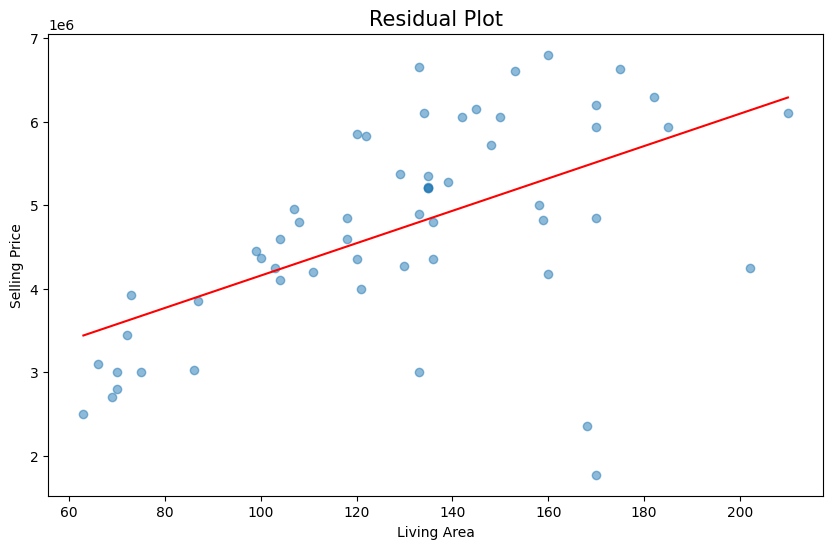

In [6]:
X_test = np.linspace(X.min(), X.max(), 100)
y_test = model.predict(X_test.reshape(-1, 1)).flatten()

plt.figure(figsize = (10,6))

plt.scatter(X, y, alpha = 0.5)
plt.plot(X_test, y_test, color = 'r')

plt.xlabel('Living Area')
plt.ylabel('Selling Price')
plt.title('Residual Plot', size=15)

plt.show()

### **e.** Is this a useful model? Are there any limitations? What could you do to improve the models ability to predict selling prices? Can this model be used in other areas than Landvetter?

**Answer** 


Linear regression model is a useful model that is easy to build and interpret, and it often performs pretty well in practice. It is commonly used in many fields, including economics, social sciences and engineering.
However, the linear regression model may not accurately capture the relationship between the variables if the relationship is nonlinear, since it assumes that a linear relationship between the dependent variable and the independent variable(s)
Additionally, linear regression is sensitive to outliers.

Several ways to improve the model's ability to predict selling prices:

- Adding new features or transforming existing features to improve the predicting ability of the model.
- Clean data, such as missing values, outliers, or incorrect values.
- Regularization, adds a penalty term to the objective function to keep the most important variables and fit them.

## Question 2

**Load dataset**

In [7]:
iris_dataset = load_iris()

iris_df = pd.DataFrame(iris_dataset['data'], columns = iris_dataset['feature_names'])
iris_df['target'] = pd.Series(iris_dataset['target'])
iris_df['species'] = iris_df['target'].replace([0,1,2], [species for species in iris_dataset['target_names']])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.10,3.50,1.40,0.20,0,setosa
1,4.90,3.00,1.40,0.20,0,setosa
2,4.70,3.20,1.30,0.20,0,setosa
3,4.60,3.10,1.50,0.20,0,setosa
4,5.00,3.60,1.40,0.20,0,setosa


### **a.** Visualise the data. Can you gain any insights from the visualisation?

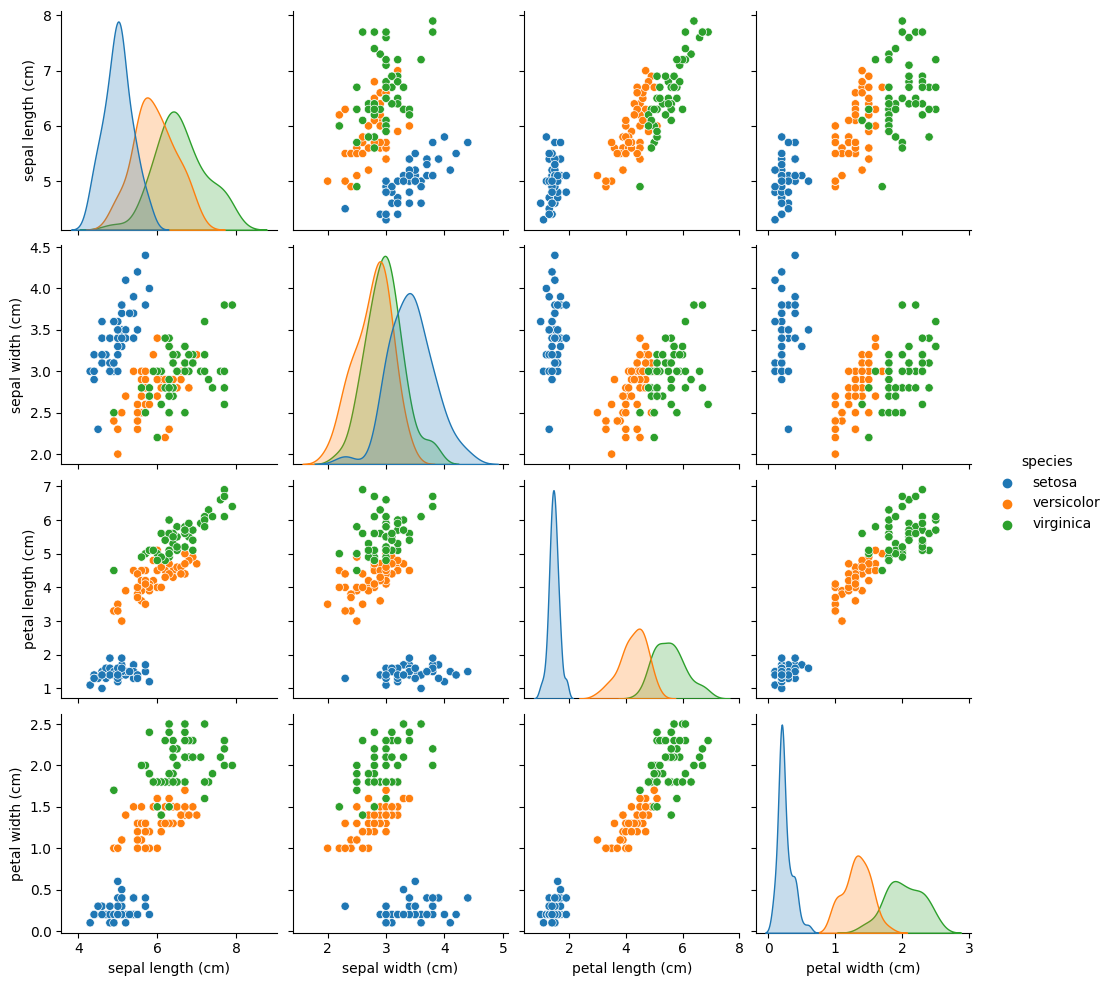

In [8]:
sns.pairplot(iris_df.iloc[:, [0,1,2,3,5]], hue='species')

plt.show()

**Insights**


Insights on petal sizes:
- Setosa species have the smallest petal width and length. 
- Versicolor species have a middle size of petal width and length. 
- Virginica have generally the largest petals among the three types of iris.

Insights on sepal sizes:
- Setosa species generally have higher sepal width but lower sepal length.
- Versicolor have average values for sepal dimensions.
- Virginica have lower sepal width but higher sepal length.

### **b.** Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.

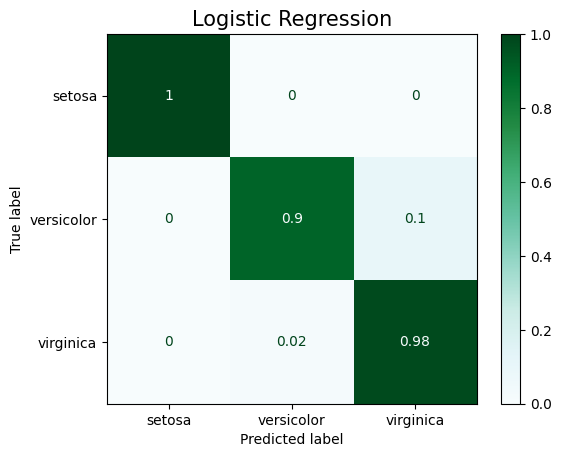

In [9]:
logisticRegr = LogisticRegression(multi_class='auto', solver='liblinear')

logisticRegr.fit(iris_dataset.data, iris_dataset.target)

metrics.ConfusionMatrixDisplay.from_estimator(logisticRegr, iris_dataset.data, iris_dataset.target, normalize='true', cmap = 'BuGn', display_labels=iris_dataset.target_names)
plt.title('Logistic Regression', fontsize=15)

plt.show()

### **c.** Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights.

#### What will happen when k grows larger for the different cases? Why does this happen?


We choose the first two columns of features, (e.g. sepal length & sepal width) to plot the decision boundary. We fit the KNeighborsClassifier model for k=[1, 5, 10, 15, 25]

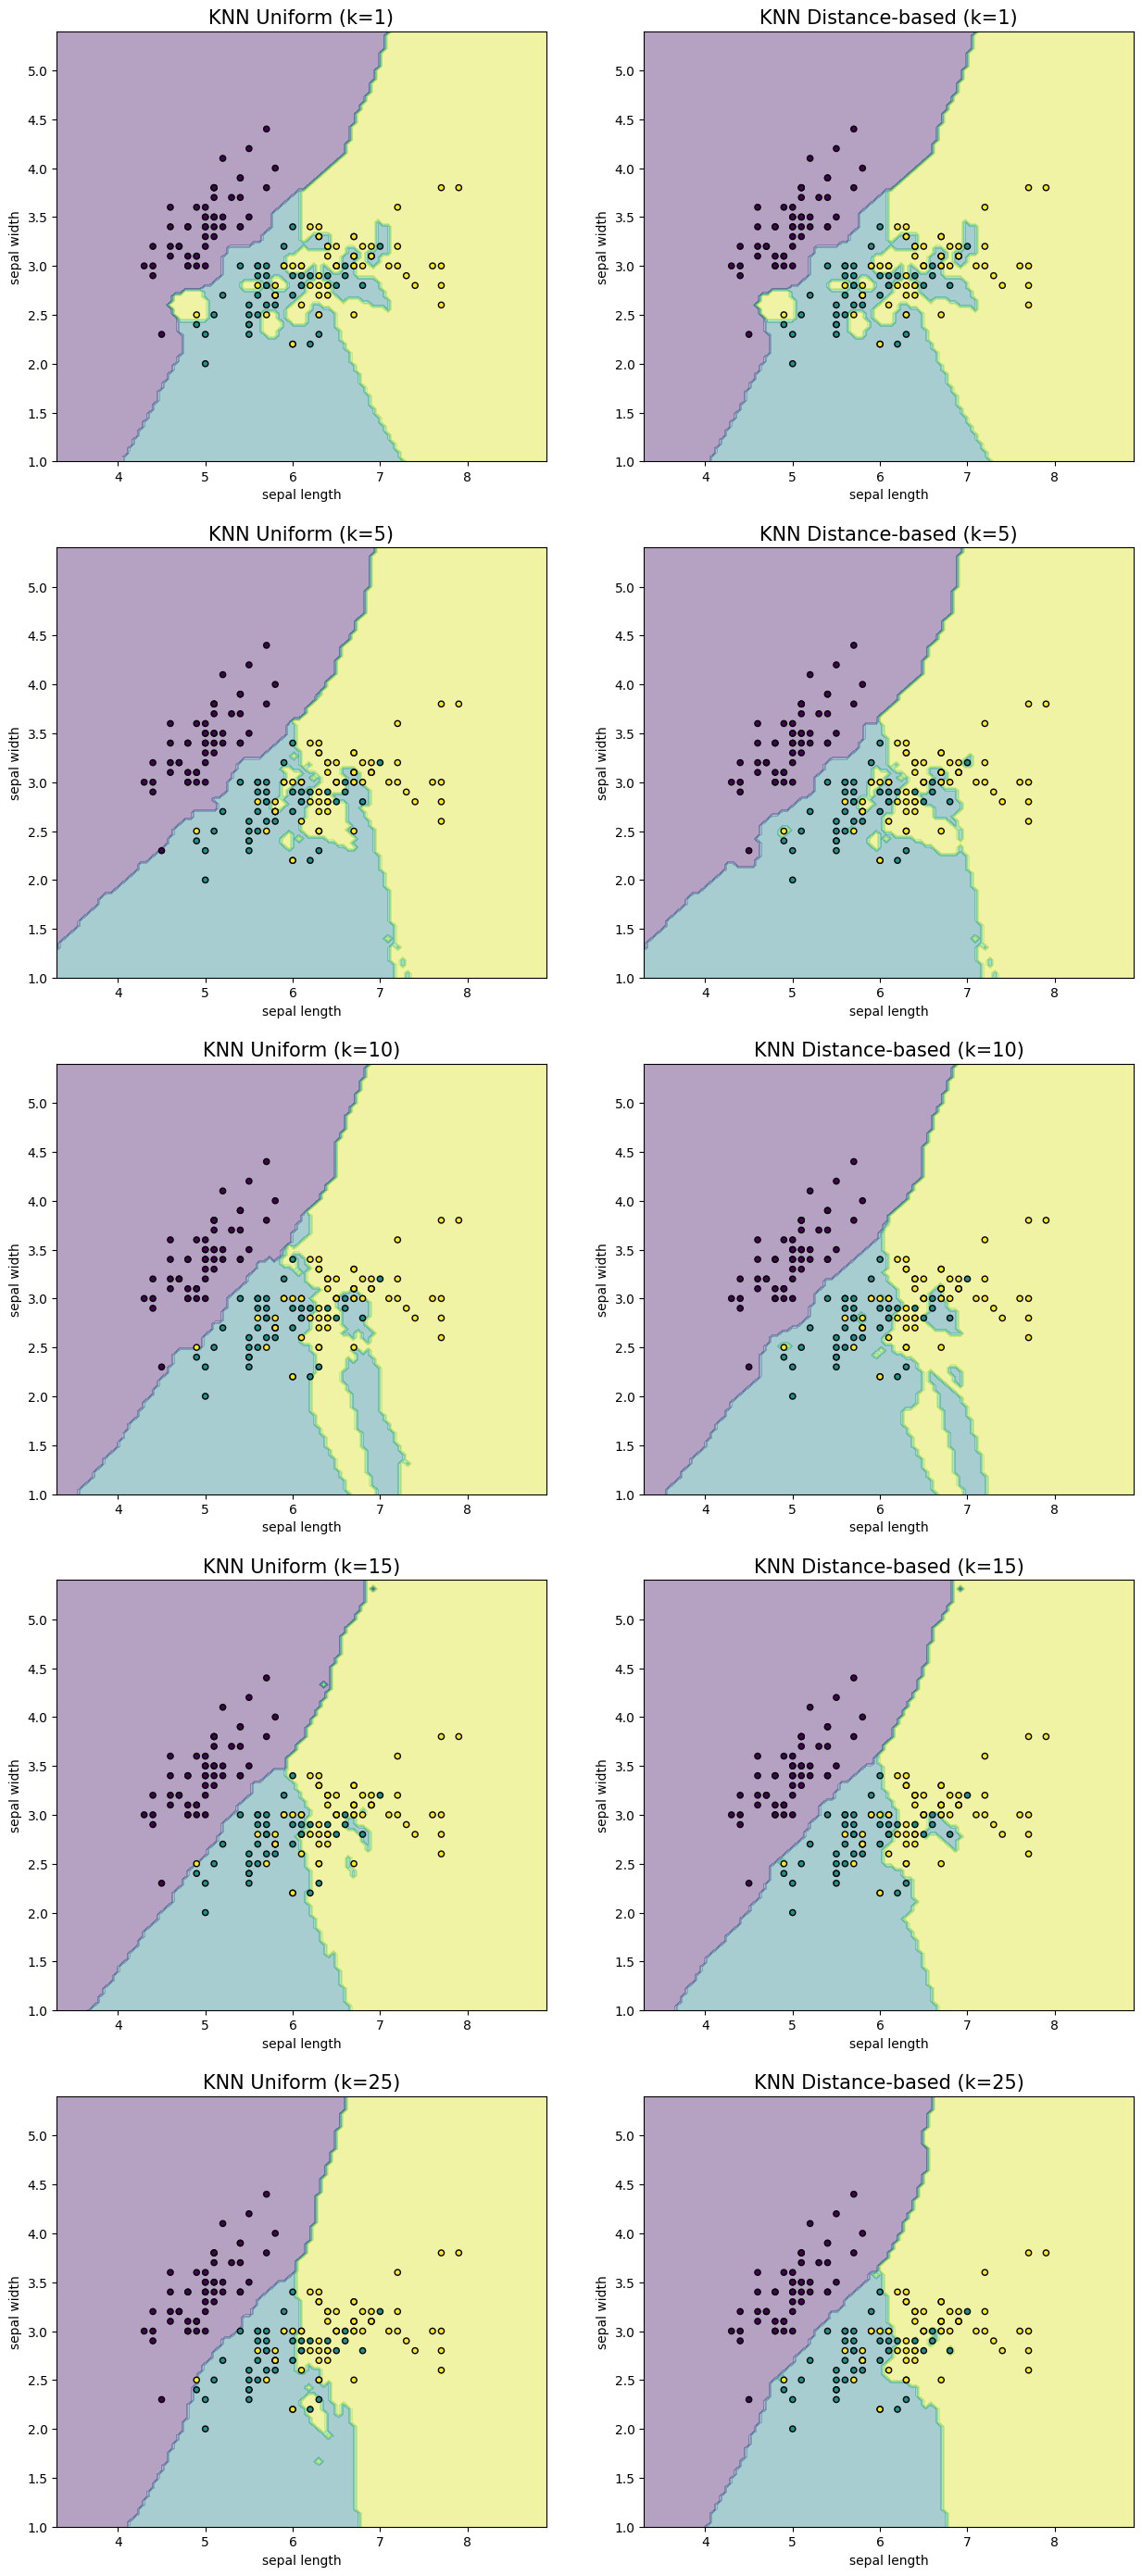

In [10]:
# k_values = range(1, 26)  # k = 1, ... , 25
k_values = [1, 5, 10, 15, 25]

fig = plt.figure(figsize=[15,35])
ax = fig.subplots(nrows=len(k_values), ncols=2)

X = iris_dataset.data[:, 0:2]
y = iris_dataset.target

for index, k in enumerate(k_values):
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_distance_based = KNeighborsClassifier(n_neighbors=k, weights='distance')

    knn_uniform.fit(X, y) 
    knn_distance_based.fit(X, y)
    
    DecisionBoundaryDisplay.from_estimator(knn_uniform, X, alpha=0.4, ax=ax[index, 0], response_method='predict', xlabel='sepal length', ylabel='sepal width')
    ax[index, 0].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax[index, 0].set_title('KNN Uniform (k=' + str(k) + ')', fontsize=15)
    
    DecisionBoundaryDisplay.from_estimator(knn_distance_based, X, alpha=0.4, ax=ax[index, 1], response_method='predict', xlabel='sepal length', ylabel='sepal width')
    ax[index, 1].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax[index, 1].set_title('KNN Distance-based (k=' + str(k) + ')', fontsize=15)


plt.show()


**Answer**


From the figure above we can see that as k increases, the KNeighborsClassifier model fits a smoother decision boundary to the data both in uniform and distance-based weights scenarios. This happens because as k increases, more neighbours are involved in voting for the result, which leads to a more stable model.

#### What do you think is the best choice of k?


To determine the best choice of k we calculate the accuracy score for different values of k in both uniform and distance-based weights scenarios.

Since our dataset is very small, we use cross-validation to maximise the use of the data.

In [11]:
k_values = range(1, 26)  # k = 1, ... , 25

uniform_scores = []
distance_based_scores = []

X = iris_dataset.data
y = iris_dataset.target

for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn_distance_based = KNeighborsClassifier(n_neighbors = k, weights='distance')
    
    knn_uniform.fit(X, y)
    knn_distance_based.fit(X, y)
    
    cross_val_uniform = cross_val_score(knn_uniform, X, y, cv=5, scoring='accuracy')
    cross_val_distance_based = cross_val_score(knn_distance_based, X, y, cv=5, scoring='accuracy')
    
    uniform_scores.append(cross_val_uniform.mean())
    distance_based_scores.append(cross_val_distance_based.mean())
   
 
max_uniform_score = max(uniform_scores)
max_distance_based_score = max(distance_based_scores)

max_uniform_k = uniform_scores.index(max_uniform_score) + 1
max_distance_based_k = distance_based_scores.index(max_distance_based_score) + 1

print('Max Accuracy of KNN Uniform:       ', max_uniform_score)
print('Max Accuracy of KNN Distance-based:', max_distance_based_score)

Max Accuracy of KNN Uniform:        0.9800000000000001
Max Accuracy of KNN Distance-based: 0.9866666666666667


**Plot**

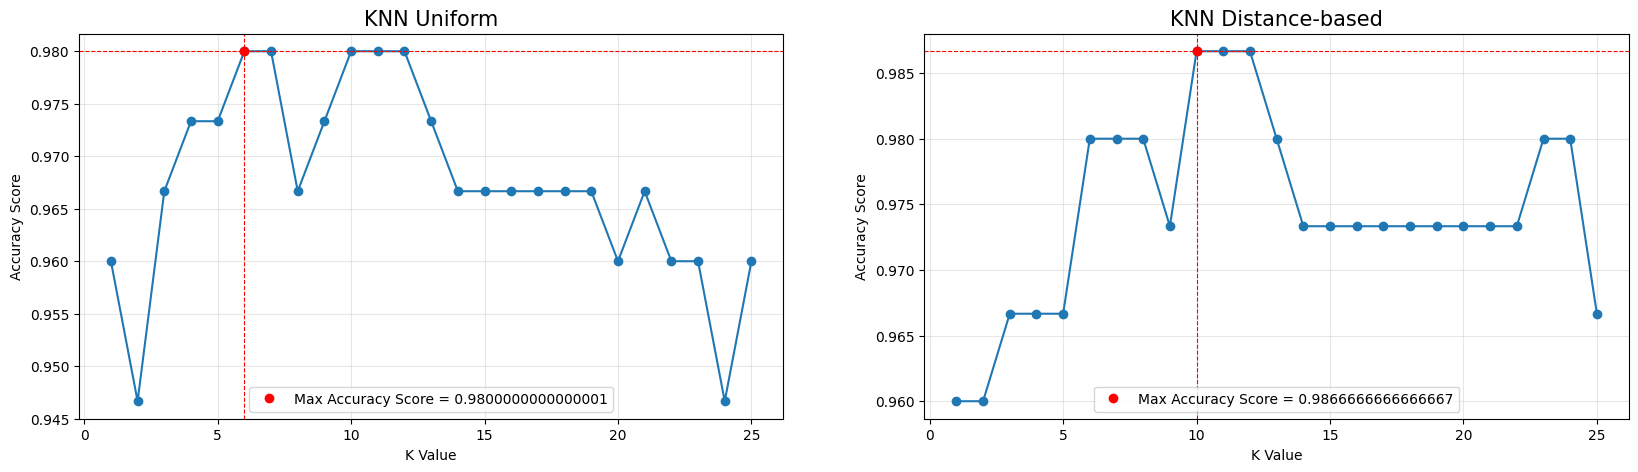

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))


ax[0].plot(np.linspace(1,25,25), uniform_scores, marker = 'o', label='_nolegend_')
ax[0].axhline(y = max_uniform_score, linestyle = 'dashed', linewidth = 0.8, color = 'r', label='_nolegend_')
ax[0].axvline(x = max_uniform_k, linestyle = 'dashed', linewidth = 0.8, color = 'r', label='_nolegend_')
ax[0].plot(max_uniform_k, max_uniform_score,'ro',) 

ax[0].grid(zorder=0, alpha=0.3)
ax[0].set_xlabel('K Value')
ax[0].set_ylabel('Accuracy Score')
ax[0].legend(['Max Accuracy Score = ' + str(max_uniform_score)], loc='lower center')
ax[0].set_title('KNN Uniform', fontsize=15)


ax[1].plot(np.linspace(1,25,25),distance_based_scores,marker = 'o', label='_nolegend_')
ax[1].axhline(y = max_distance_based_score, linestyle = 'dashed', linewidth = 0.8,color = 'r', label='_nolegend_')
ax[1].axvline(x = max_distance_based_k, linestyle = 'dashed', linewidth = 0.8, color = 'r', label='_nolegend_')
ax[1].plot(max_distance_based_k, max_distance_based_score,'ro',) 

ax[1].grid(zorder=0, alpha=0.3)
ax[1].set_xlabel('K Value')
ax[1].set_ylabel('Accuracy Score')
ax[1].legend(['Max Accuracy Score = ' + str(max_distance_based_score)], loc='lower center')
ax[1].set_title('KNN Distance-based', fontsize=15)


plt.show()

**Answer**


From the figure above we can conclude that for the uniform weight scenario the best value of k is 6 (k=7,10,11,12 have the same score) and for distance-based weight scenario the best value of k is 10 (k=11,12 have the same score).

 We would choose **k=6** and **k=10** for these two scenarios respectively, because a lower value of k can reduce the overall complexity of the model.

#### Compute a confusion matrix for the best uniform and distance-based classifiers.

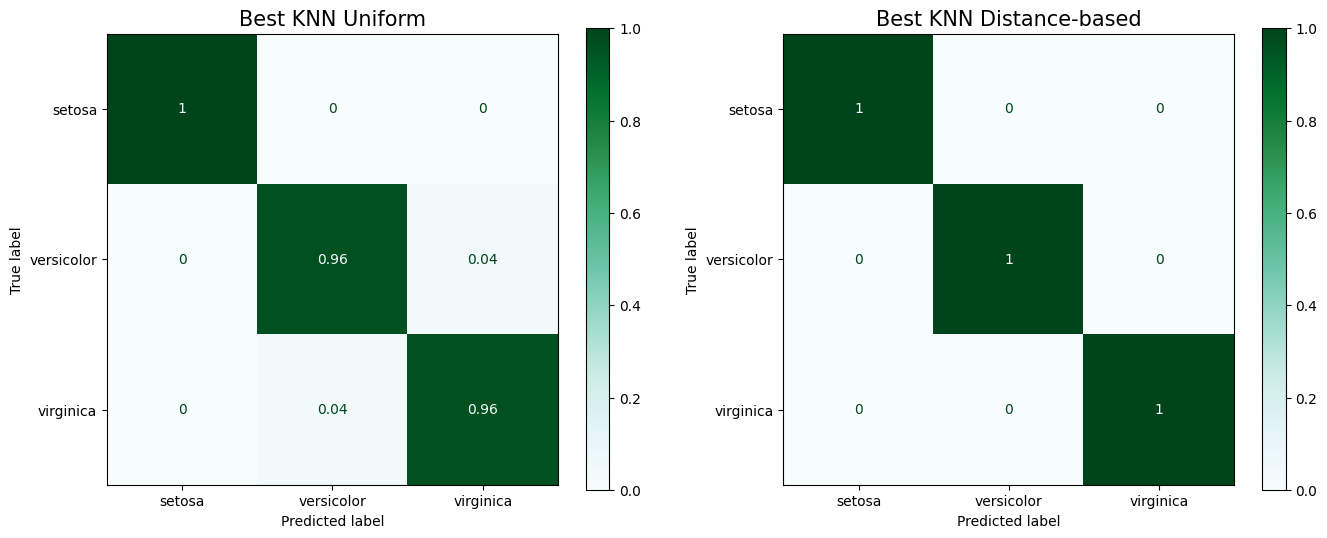

In [13]:
knn_uniform_best = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn_distance_based_best = KNeighborsClassifier(n_neighbors=10, weights='distance')

knn_uniform_best.fit(X, y) 
knn_distance_based_best.fit(X, y)


fig, ax = plt.subplots(1, 2, figsize = (16, 6))

metrics.ConfusionMatrixDisplay.from_estimator(knn_uniform_best, X, y, normalize='true', cmap = 'BuGn', display_labels=iris_dataset.target_names, ax=ax[0])
ax[0].set_title('Best KNN Uniform', fontsize=15)

metrics.ConfusionMatrixDisplay.from_estimator(knn_distance_based_best, X, y, normalize='true', cmap = 'BuGn', display_labels=iris_dataset.target_names, ax=ax[1])
ax[1].set_title('Best KNN Distance-based', fontsize=15)


plt.show()

### **d.** Compare the logistic regression classifier in (a) with the k-nearest neighbour classifiers in (b). What do you observe? Are all classes equally challenging for the models to predict?

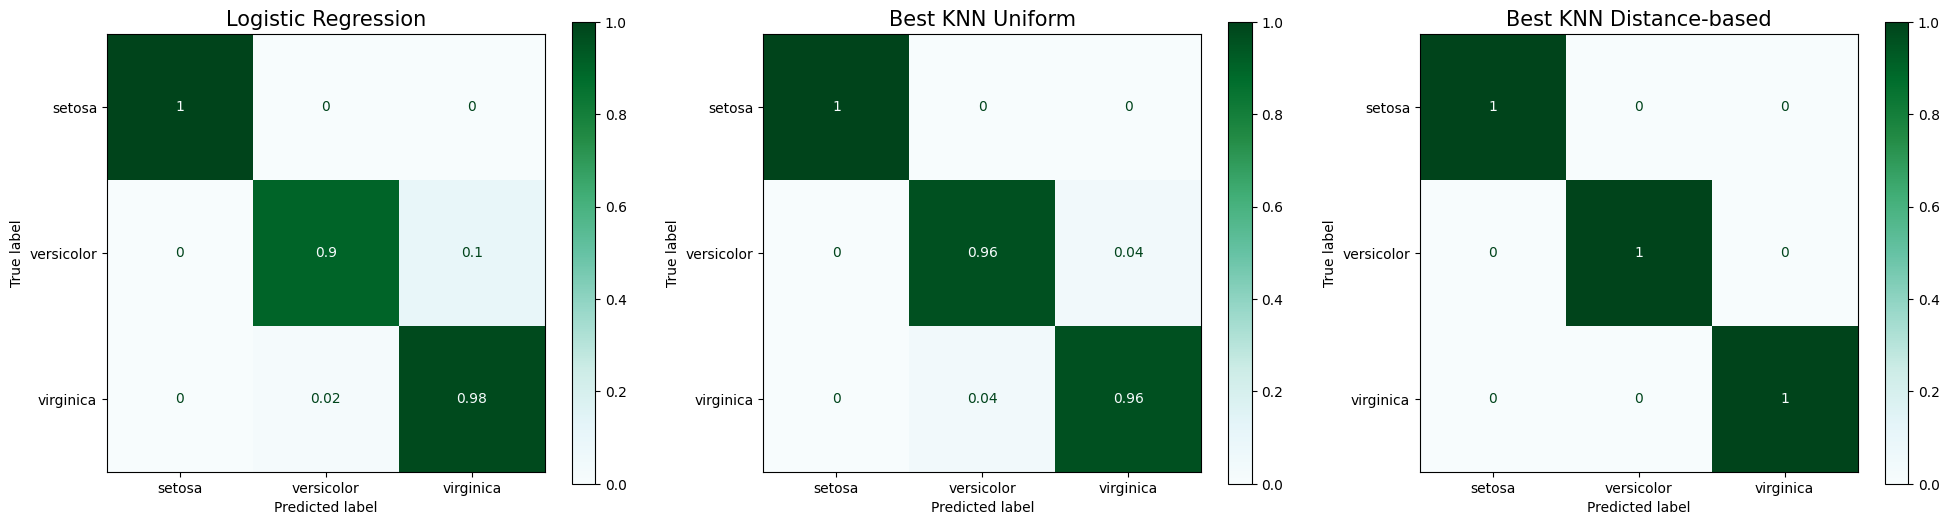

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (24, 6))

metrics.ConfusionMatrixDisplay.from_estimator(logisticRegr, iris_dataset.data, iris_dataset.target, normalize='true', cmap = 'BuGn', display_labels=iris_dataset.target_names, ax=ax[0])
ax[0].set_title('Logistic Regression', fontsize=15)

metrics.ConfusionMatrixDisplay.from_estimator(knn_uniform_best, X, y, normalize='true', cmap = 'BuGn', display_labels=iris_dataset.target_names, ax=ax[1])
ax[1].set_title('Best KNN Uniform', fontsize=15)

metrics.ConfusionMatrixDisplay.from_estimator(knn_distance_based_best, X, y, normalize='true', cmap = 'BuGn', display_labels=iris_dataset.target_names, ax=ax[2])
ax[2].set_title('Best KNN Distance-based', fontsize=15)


plt.show()


**Answer**


By comparing the three confusion matrices, k-nearest neighbour classifier with distance-based weight performs the best. The performance of the logistic regression classifier and the k-nearest neighbour classifier with uniform weight is very similar. They both make few errors on prediction of versicolor and virginica.

Generally speaking, Logistic regression and k-nearest neighbor (KNN) are both commonly used for classification. KNN is a non-parametric model, whereas logistic regression is a parametric model. Logistic regression assumes a linear relationship between the input features and the output, which may not be the case in all scenarios. KNN does not make any assumptions about the distribution of the data, but it needs more computation at test time, KNN can also be sensitive to the choice of k as we observed in this assignment.